In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("Train.csv")
train.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,0.293416,-0.945599,-0.421105,0.406816,0.525662,-82.154667
1,-0.836084,-0.189228,-0.776403,-1.053831,0.597997,-48.897960
2,0.236425,0.132836,-0.147723,0.699854,-0.187364,77.270371
3,0.175312,0.143194,-0.581111,-0.122107,-1.292168,-2.988581
4,-1.693011,0.542712,-2.798729,-0.686723,1.244077,-37.596722


In [3]:
train_data = train.values
print(train_data)

[[ 2.93416239e-01 -9.45598713e-01 -4.21105147e-01  4.06816021e-01
   5.25661832e-01 -8.21546666e+01]
 [-8.36084081e-01 -1.89228039e-01 -7.76402618e-01 -1.05383124e+00
   5.97996852e-01 -4.88979602e+01]
 [ 2.36425114e-01  1.32836018e-01 -1.47722982e-01  6.99853963e-01
  -1.87364163e-01  7.72703707e+01]
 ...
 [ 1.04417694e+00 -8.99206485e-01  1.73039905e+00 -1.87105676e+00
   4.42519647e-01 -1.07510508e+02]
 [-1.26917290e+00 -5.05215916e-03  1.85766873e+00 -1.08036482e+00
   7.36333937e-01 -4.73415578e+01]
 [-1.88400025e+00 -8.49427430e-01 -1.45227035e+00  4.88613076e-01
   1.45957580e+00 -1.15939003e+02]]


In [4]:
X = train_data[:,:-1]
Y = train_data[:,-1]

In [5]:
X.shape,Y.shape

((1600, 5), (1600,))

In [6]:
Y = Y.reshape((-1,1))
Y.shape

(1600, 1)

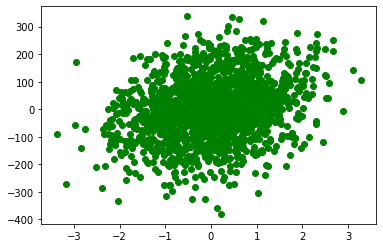

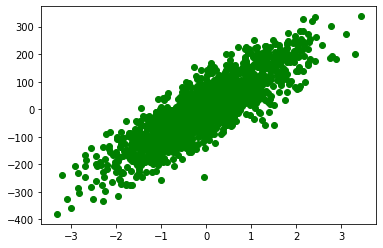

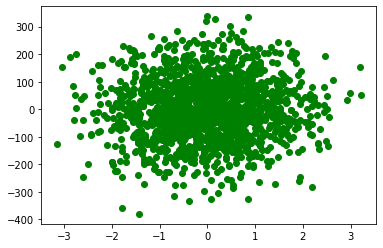

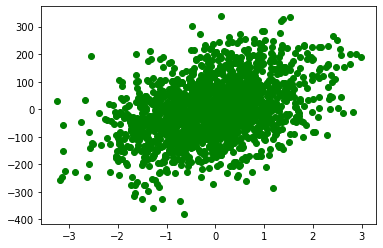

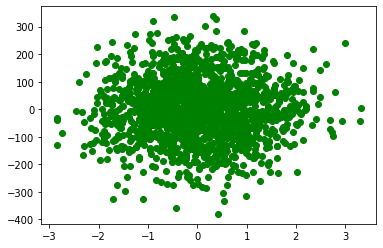

In [7]:
for i in range(5):
    plt.scatter(X[:,i],Y,color = 'green')
    plt.show()

In [8]:
train.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,target
count,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,0.004114,-0.027604,-0.044459,-0.042408,0.012005,0.318835
std,0.997338,1.021776,1.011768,1.017189,0.978654,110.741562
min,-3.380125,-3.314844,-3.153118,-3.250169,-2.851707,-379.829794
25%,-0.647165,-0.705030,-0.706385,-0.709504,-0.615880,-71.897040
50%,-0.000360,-0.043769,-0.041272,-0.029756,-0.013527,-0.610665
75%,0.682118,0.645442,0.639130,0.646290,0.650089,71.226603
max,3.287205,3.438895,3.216176,2.985410,3.321770,337.643014


In [9]:
def hypothesis(X,theta):
    return np.dot(X,theta)

def error (X,y,theta):
    e = 0.0
    m = X.shape[0]
    y_ = hypothesis(X,theta)
    e = np.sum((y-y_)**2)
    return e/m

def gradient(X,y,theta):
    y_ = hypothesis(X,theta)
    grad = np.dot(X.T,(y_ - y))
    m = X.shape[0]
    return grad/m

In [10]:
def batch_gradient_descent(X,y,batch_size=20,learning_rate=0.01,max_iters=100):
    n = X.shape[1]
    theta = np.zeros((n,))
    error_list = []
    data = np.hstack((X,y.reshape(-1,1)))     # stacking X and y in the same array

    for i in range(max_iters):
        np.random.shuffle(data)   # shuffling the data to maintain randomness in the subset
        m = data.shape[0]  # total number of examples
        total_batches = m//batch_size
    
        for i in range(total_batches):
            batch_data = data[i*batch_size : (i+1)*batch_size,:] 

            x_batch = batch_data[:,:-1]
            y_batch = batch_data[:,-1]
            
            batch_gradient = gradient(x_batch,y_batch,theta)
            theta = theta - learning_rate*batch_gradient
            
            e = error(x_batch,y_batch,theta)
            error_list.append(e)
        
    return theta, error_list

In [11]:
theta,error_list = batch_gradient_descent(X,Y)

In [12]:
theta

array([29.76193182, 92.44470498,  8.04335207, 44.56093855,  2.54519536])

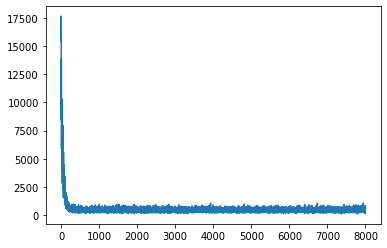

In [13]:
plt.plot(error_list)
plt.show()

In [14]:
def r2_score(y,y_):
    num = np.sum((y-y_)**2)
    denom = np.sum((y-y.mean())**2)
    score = 1 - num/denom
    return score*100

In [15]:
test = pd.read_csv("Test.csv")
test = test.values
test.shape

(400, 5)

In [16]:
Y_ = hypothesis(X,theta)
print(r2_score(Y.reshape((-1,)),Y_))

96.40700205189096


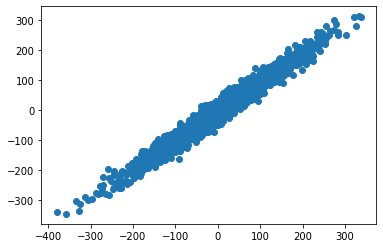

In [17]:
plt.scatter(Y,Y_)
plt.show()

In [18]:
target = hypothesis(test,theta)
target.shape

(400,)

In [19]:
dfs = pd.read_csv("Sample_Submission.csv")
dfs

,Id,target
0,0,0
1,1,1
2,2,2
3,3,3
4,4,4
...,...,...
395,395,395
396,396,396
397,397,397
398,398,398


In [21]:
data = {
    "Id" : np.arange(400),
    "target" : target
}

In [22]:
df = pd.DataFrame(data)
df

,Id,target
0,0,109.759606
1,1,112.480621
2,2,-26.529003
3,3,-49.297183
4,4,-100.953429
...,...,...
395,395,-86.430652
396,396,-190.908856
397,397,120.429434
398,398,59.943868


In [25]:
df = df.astype('int32')
df

,Id,target
0,0,109
1,1,112
2,2,-26
3,3,-49
4,4,-100
...,...,...
395,395,-86
396,396,-190
397,397,120
398,398,59


In [27]:
df.to_csv("Air_pollution.csv",index = False)